In [1]:
import yt
import glob
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
plt.ion()

/usr/lib64/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
yt.funcs.mylog.setLevel(0)

plotfiles = sorted(list(glob.glob("det_x_plt?????")))

In [5]:
def get_x_var(pf, var="Temp"):
    ds = yt.load(pf)
    time = float(ds.current_time)
    ad = ds.all_data()
    srt = np.argsort(ad['x'])                                                                                                                                                
    x_coord = np.array(ad['x'][srt])                                                                                                                                         
    var = np.array(ad[var][srt])
    return time, x_coord, var

<IPython.core.display.Javascript object>


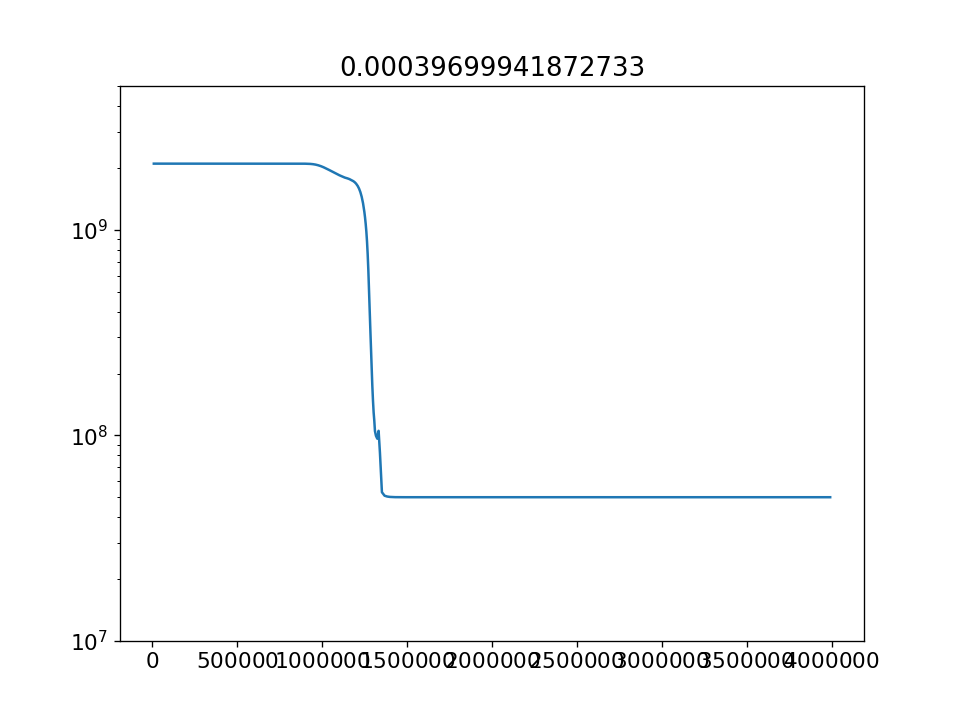

KeyboardInterrupt: 

In [7]:
for n, pf in enumerate(plotfiles):
    t, x, v = get_x_var(pf)
    if n == 0:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.set_ylim((1.e7, 5.e9))
        ax.set_title(t)
        line, = ax.semilogy(x, v)
    else:
        line.set_data(x, v)
        ax.set_title(t)
        fig.canvas.draw()